**Day 2 - June 3 2022**

| Student                       | ID        |
| -------------                 |:---------:|
| Benjamin Starostka Jakobsen   | s184198   |
| Muhammad REDACTED             | REDACTED  |
| Victor REDACTED               | REDACTED  |

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import expon, kstwobign, norm, pareto

sns.set_style("white")

# Exercise 3
# Continuous random variables

**In the excercise you can use a build in procedure for generating random numbers. Compare the results obtained in simulations with expected results. Use histograms (and tests).**

## 1. 
**Generate simulated values from the following distributions**

**Verify the results by comparing histograms with analytical results and perform tests for distribution type.**

### (a) Exponential distribution

In [ ]:
def gen_exponential_distr(lamb, N):
    U = np.random.uniform(0.0, 1.0, size=N)
    X = []
    for u in U:
        X += [-(np.log(u) / lamb)]
    return X

In [ ]:
N = 10000
lamb = 4
X_exp = gen_exponential_distr(lamb, N)

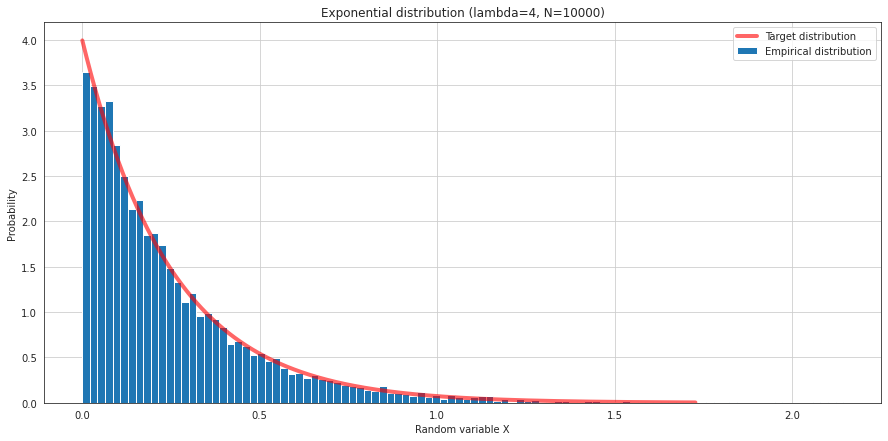

In [ ]:
x = np.linspace(
    expon.ppf(0.001, scale=1 / lamb), expon.ppf(0.999, scale=1 / lamb), 1000
)
y = expon.pdf(x, scale=1 / lamb)

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.plot(x, y, "-", lw=4, alpha=0.6, color="red", label="Target distribution")
ax.hist(X_exp, bins=100, density=True, label="Empirical distribution")
ax.set(
    xlabel="Random variable X",
    ylabel="Probability",
    title=f"Exponential distribution (lambda={lamb}, N={N})",
)
ax.legend()
ax.grid()

plt.show()

Comparing the histograms we see that the empirical distribution closely resembles that of an exponential distribution.

**Kolmogorov-smirnov Test**

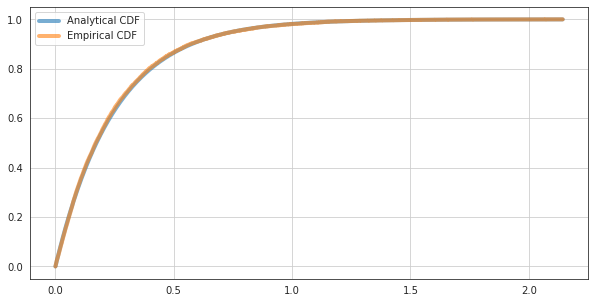

In [ ]:
X_exp_sorted = np.sort(X_exp)
cdf_observed = np.arange(1, N + 1) / N
cdf_expected = expon.cdf(X_exp_sorted, scale=1 / lamb)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(X_exp_sorted, cdf_expected, "-", lw=4, alpha=0.6, label="Analytical CDF")
ax.step(X_exp_sorted, cdf_observed, "-", lw=4, alpha=0.6, label="Empirical CDF")
ax.legend()
ax.grid()

plt.show()

In [ ]:
def ks_test(cdf_observed, cdf_expected):
    D = 0
    for i in range(len(cdf_observed)):
        d = abs(cdf_observed[i] - cdf_expected[i])
        D = max(D, d)
    return D

In [ ]:
D = ks_test(cdf_observed, cdf_expected)
adjusted_t = (np.sqrt(N) + 0.12 + (0.11 / np.sqrt(N))) * D
print(adjusted_t)

0.9651678923626239


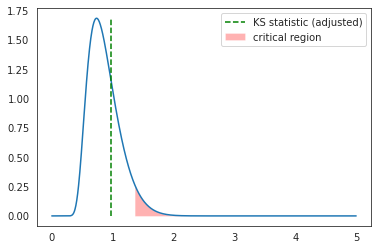

In [ ]:
# evaluate the test-statistic under the null distribution i.e., kolmogorov


x = np.linspace(0, 5, 1000)
y = kstwobign.pdf(x)

fig, ax = plt.subplots()

ax.plot(x, y)
ax.vlines(
    x=adjusted_t,
    ymin=0,
    ymax=max(y),
    color="green",
    linestyle="--",
    label="KS statistic (adjusted)",
)

ax.fill_between(
    x,
    0,
    y,
    where=x >= kstwobign.ppf(0.95),
    facecolor="red",
    alpha=0.3,
    interpolate=True,
    label="critical region",
)
ax.legend()

plt.show()

### (b) Normal distribution
**The Box-Mueller method**

In [ ]:
def gen_normal_distr_box_mueller(mu, sigma, N, cosine_algo=False):
    Z = []
    while len(Z) < N:
        if cosine_algo:
            # Generation of cos and sin Generation of cos and sin
            # Acception/rejection algorithm
            v1, v2 = np.random.uniform(low=-1, high=1, size=2)
            r2 = v1**2 + v2**2
            if r2 > 1:
                continue
            cosine = v1 / np.sqrt(r2)
            sine = v2 / np.sqrt(r2)
        else:
            u2 = np.random.uniform()
            cosine = np.cos(2 * np.pi * u2)
            sine = np.sin(2 * np.pi * u2)

        # The Box-Muller method
        u1 = np.random.uniform()
        z1, z2 = np.sqrt(-2 * np.log(u1)) * np.array([cosine, sine])

        Z += [z1, z2]

    X = mu + sigma * np.array(Z)
    return X

In [ ]:
N = 10000
mu = 2
sigma = 0.5
X_norm_1 = gen_normal_distr_box_mueller(mu, sigma, N, cosine_algo=False)
X_norm_2 = gen_normal_distr_box_mueller(mu, sigma, N, cosine_algo=False)

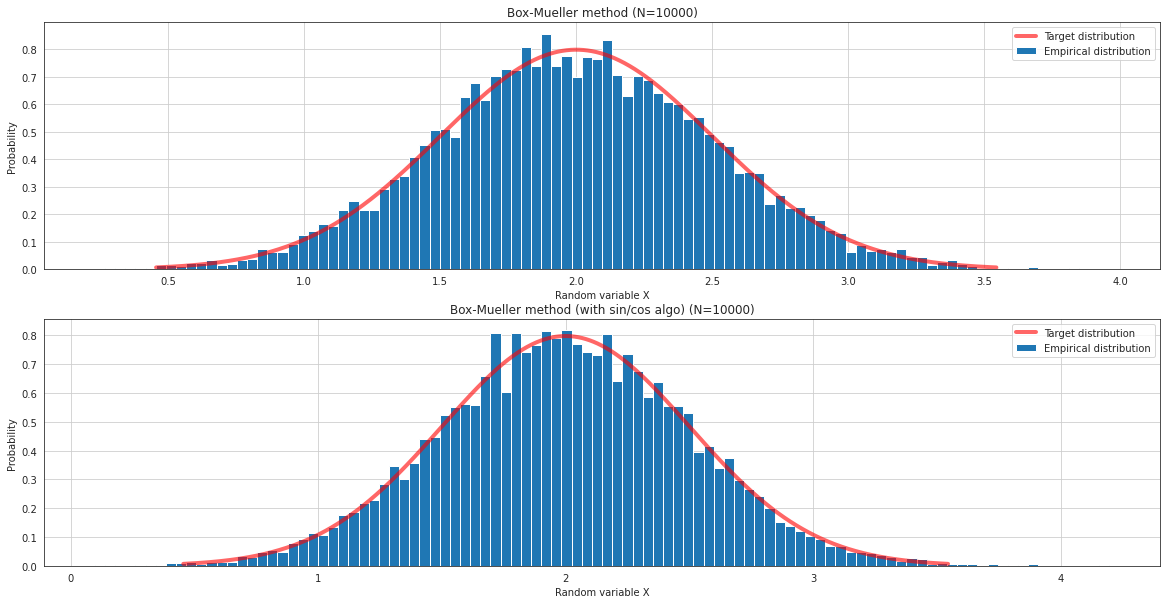

In [ ]:
x = np.linspace(
    norm.ppf(0.001, loc=mu, scale=sigma), norm.ppf(0.999, loc=mu, scale=sigma), 1000
)
y = norm.pdf(x, loc=mu, scale=sigma)

fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(x, y, "-", lw=4, alpha=0.6, color="red", label="Target distribution")
axes[0].hist(X_norm_1, bins=100, density=True, label="Empirical distribution")
axes[0].set(
    xlabel="Random variable X",
    ylabel="Probability",
    title=f"Box-Mueller method (N={N})",
)
axes[0].legend()
axes[0].grid()

axes[1].plot(x, y, "-", lw=4, alpha=0.6, color="red", label="Target distribution")
axes[1].hist(X_norm_2, bins=100, density=True, label="Empirical distribution")
axes[1].set(
    xlabel="Random variable X",
    ylabel="Probability",
    title=f"Box-Mueller method (with sin/cos algo) (N={N})",
)
axes[1].legend()
axes[1].grid()

plt.show()

The empirical distribution looks like a normal distribution.
Computing the sine and cosine using 2 random uniform numbers, $u_1$ and $u_2$, or computing them using the accept/reject algorithm (with $v_1$, $v_2$ and $u_1$) does not seems to have an influence. Both ways are equivalent. 

**Central limit theorem**

In [ ]:
def gen_normal_distr_central_limit(mu, sigma, N, n):
    Z = []
    while len(Z) < N:
        U = np.random.uniform(size=n)
        z = np.sum(U) - (n / 2)
        Z += [z]

    X = mu + sigma * np.array(Z)
    return X

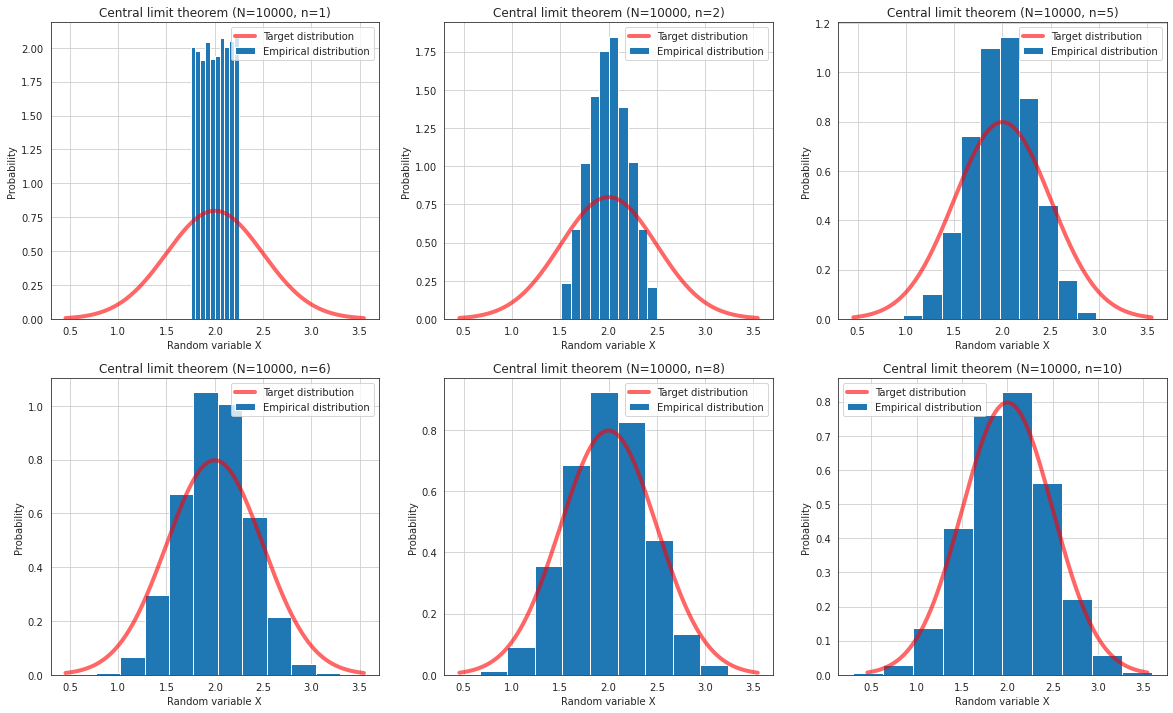

In [ ]:
ns = [1, 2, 5, 6, 8, 10]

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
x = np.linspace(
    norm.ppf(0.001, loc=mu, scale=sigma), norm.ppf(0.999, loc=mu, scale=sigma), 1000
)
y = norm.pdf(x, loc=mu, scale=sigma)

for k in range(len(ns)):
    n = ns[k]
    X_norm = gen_normal_distr_central_limit(mu, sigma, N, n)

    i, j = int(k / 3), k % 3
    axes[i, j].plot(
        x, y, "-", lw=4, alpha=0.6, color="red", label="Target distribution"
    )
    axes[i, j].hist(X_norm, bins=10, density=True, label="Empirical distribution")
    axes[i, j].set(
        xlabel="Random variable X",
        ylabel="Probability",
        title=f"Central limit theorem (N={N}, n={n})",
    )
    axes[i, j].legend()
    axes[i, j].grid()

plt.show()

The influence of parameter $n$ for the central limit theorem:
* if $n=1$, this is equivalent to simply translate by $\mu$ and multiply by $\sigma$ a uniform distribution $U(0,1)$.
* Then, as $n$ increases, the empirical distribution looks more and more like the target normal distribution.
Indeed, the more $u_i$ taken into account to compute one $X$, the more the generator can model the extreme values, the tail of the distribution. 

**Kolmogorov-Smirnonv Test**

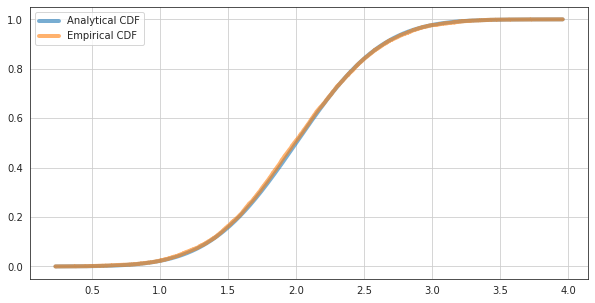

In [ ]:
X_norm_sorted = np.sort(X_norm_1)
cdf_observed = np.arange(1, N + 1) / N
cdf_expected = norm.cdf(X_norm_sorted, loc=mu, scale=sigma)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(X_norm_sorted, cdf_expected, "-", lw=4, alpha=0.6, label="Analytical CDF")
ax.step(X_norm_sorted, cdf_observed, "-", lw=4, alpha=0.6, label="Empirical CDF")
ax.legend()
ax.grid()

plt.show()

In [ ]:
D = ks_test(cdf_observed, cdf_expected)
adjusted_t = (np.sqrt(N) + 0.12 + (0.11 / np.sqrt(N))) * D
print(adjusted_t)

1.4630393878153947


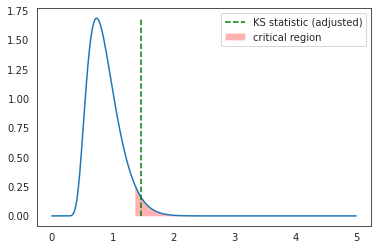

In [ ]:
# evaluate the test-statistic under the null distribution i.e., kolmogorov


x = np.linspace(0, 5, 1000)
y = kstwobign.pdf(x)

fig, ax = plt.subplots()

ax.plot(x, y)
ax.vlines(
    x=adjusted_t,
    ymin=0,
    ymax=max(y),
    color="green",
    linestyle="--",
    label="KS statistic (adjusted)",
)

ax.fill_between(
    x,
    0,
    y,
    where=x >= kstwobign.ppf(0.95),
    facecolor="red",
    alpha=0.3,
    interpolate=True,
    label="critical region",
)
ax.legend()

plt.show()

### (c) Pareto distribution
**with β = 1 and experiment with different values of k values: k = 2.05, k = 2.5, k = 3 and k = 4.**

In [ ]:
def gen_pareto_distr(k, beta, N):
    U = np.random.uniform(low=0.0, high=1.0, size=N)
    X = []
    for u in U:
        X += [beta * (u ** (-1 / k))]
    return X

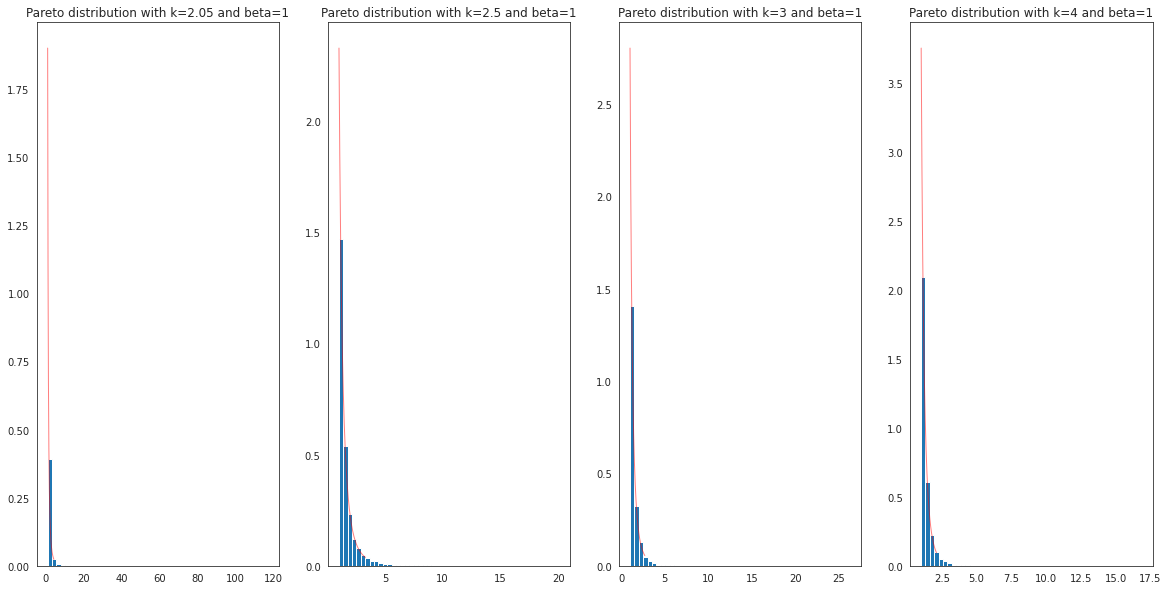

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 10))

k_values = [2.05, 2.5, 3, 4]
beta = 1
for i, k in enumerate(k_values):
    X = gen_pareto_distr(k, beta, N)

    # plot histogram and pdf
    x = np.linspace(
        pareto.ppf(0.05, scale=beta, b=k), pareto.ppf(0.95, scale=beta, b=k), N
    )
    y = pareto.pdf(x, scale=beta, b=k)
    ax[i].plot(x, y, "-", lw=1, alpha=0.5, color="red", label="Target distribution")
    ax[i].hist(X, bins=50, density=True, label="Custom patero distribution")
    ax[i].set(title=f"Pareto distribution with k={k} and beta={beta}")

plt.show()

**Kolmogorov-Smirnov Test**

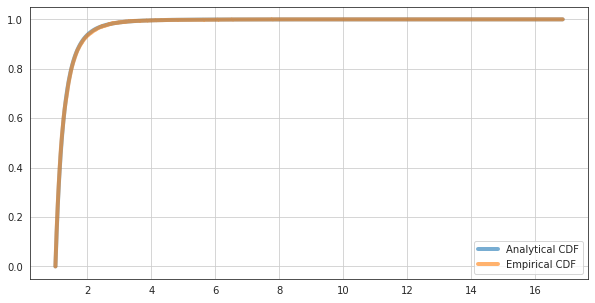

In [ ]:
X_pareto_sorted = np.sort(X)
cdf_observed = np.arange(1, N + 1) / N
cdf_expected = pareto.cdf(X_pareto_sorted, scale=beta, b=k)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(X_pareto_sorted, cdf_expected, "-", lw=4, alpha=0.6, label="Analytical CDF")
ax.step(X_pareto_sorted, cdf_observed, "-", lw=4, alpha=0.6, label="Empirical CDF")
ax.legend()
ax.grid()

plt.show()

In [ ]:
D = ks_test(cdf_observed, cdf_expected)
adjusted_t = (np.sqrt(N) + 0.12 + (0.11 / np.sqrt(N))) * D
print(adjusted_t)

0.8944797540832011


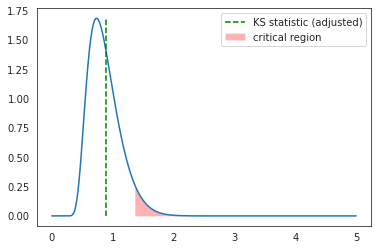

In [ ]:
# evaluate the test-statistic under the null distribution i.e., kolmogorov


x = np.linspace(0, 5, 1000)
y = kstwobign.pdf(x)

fig, ax = plt.subplots()

ax.plot(x, y)
ax.vlines(
    x=adjusted_t,
    ymin=0,
    ymax=max(y),
    color="green",
    linestyle="--",
    label="KS statistic (adjusted)",
)

ax.fill_between(
    x,
    0,
    y,
    where=x >= kstwobign.ppf(0.95),
    facecolor="red",
    alpha=0.3,
    interpolate=True,
    label="critical region",
)
ax.legend()

plt.show()

## 2.
**For the Pareto distribution with support on $[\beta, \infty[$ compare mean value and variance, with analytical results, which can be calculated as $E(X) = \beta\frac{k}{k-1}$ (for $k > 1$) and
$Var(X) = \beta^2\frac{k}{(k-1)^2(k-2)}$ (for $k > 2$). Explain problems if any.**

Analytical mean: 1.9523809523809526, variance: 37.18820861678019


[]

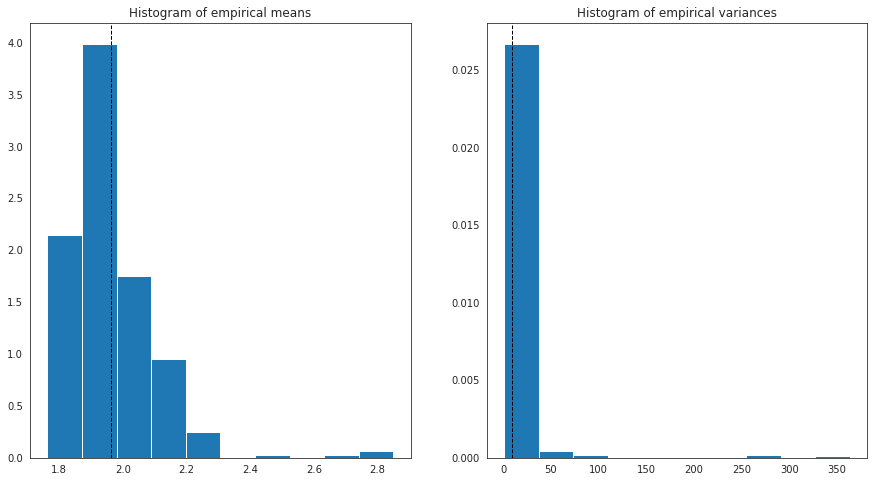

In [ ]:
experiments = 300
k = 2.05

E = beta * k / (k - 1)
V = beta**2 * k / ((k - 1) ** 2 * (k - 2))
print(f"Analytical mean: {E}, variance: {V}")

N = 500

means = []
variances = []
for i in range(experiments):
    X = gen_pareto_distr(k, beta, N)
    # check support (get rid of them or sample again?)
    mean = np.mean(X)
    means += [mean]
    variance = np.var(X)
    variances += [variance]

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# mean of simulations
ax[0].hist(means, density=True)
ax[0].axvline(np.mean(means), color="k", linestyle="dashed", linewidth=1)
ax[0].set(title="Histogram of empirical means")

# variances
ax[1].hist(variances, density=True)
ax[1].axvline(np.mean(variances), color="k", linestyle="dashed", linewidth=1)
ax[1].set(title="Histogram of empirical variances")

plt.plot()

The mean and variance is not robust to outliers. Samples may shift the empirical mean away from the analytical.

Higher values of $k$ introduces more variance.

## 3.
**For the normal distribution generate 100 95% confidence intervals for the mean and variance, each based on 10 observations. Discuss the results.**
$$
\bar{x} \pm t_{0.975} * \frac{s}{\sqrt{n}}
$$

where $t$ is the is the 97.5 quantile from the t-distribution with $n-1$ degrees of freedom.
$$
\left[\frac{(n-1)s^2}{\chi^2_{0.975}},\frac{(n-1)s^2}{\chi^2_{0.025}}\right]
$$

where the quantiles come from a $\chi^2$-distribution with $v=n-1$ degrees of freedom.

In [ ]:
mu = 2
sigma = 0.5
N = 10


t_0975 = stats.t(df=N - 1).ppf(0.975)
chi_0025 = stats.chi2(df=N - 1).ppf(0.025)
chi_0975 = stats.chi2(df=N - 1).ppf(0.975)

mean_intervals = np.zeros((100, 2))
variance_intervals = np.zeros((100, 2))
for i in range(100):

    X_norm = gen_normal_distr_box_mueller(mu, sigma, N)
    mu_bar = np.mean(X_norm)
    sigma_bar = np.std(X_norm)

    tmp = t_0975 * sigma_bar / np.sqrt(N)
    mean_intervals[i] = [mu_bar - tmp, mu_bar + tmp]

    variance_intervals[i] = [
        (N - 1) * (sigma_bar**2) / chi_0975,
        (N - 1) * (sigma_bar**2) / chi_0025,
    ]

In [ ]:
# How many times mu falls into them?
count_mean = 0
count_variance = 0
for i in range(100):
    interval = mean_intervals[i]
    if interval[0] <= mu <= interval[1]:
        count_mean += 1

    interval = variance_intervals[i]
    if interval[0] <= sigma**2 <= interval[1]:
        count_variance += 1

print(f"The true mean is included in the confidence intervals {count_mean} times")
print(
    "The true variance is included in the confidence intervals {} times".format(
        count_variance
    )
)

The true mean is included in the confidence intervals 94 times
The true variance is included in the confidence intervals 98 times


This is expected, because by definition those intervals should contains the truth value 95% of the time!

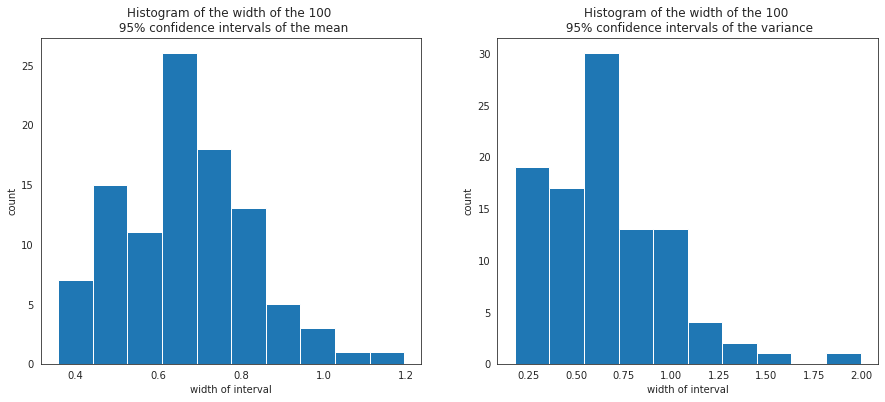

In [ ]:
# histogram of the intervals width
width_means = mean_intervals[:, 1] - mean_intervals[:, 0]
width_variances = variance_intervals[:, 1] - variance_intervals[:, 0]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].hist(width_means)
axes[0].set(
    xlabel="width of interval",
    ylabel="count",
    title="Histogram of the width of the 100 \n 95% confidence intervals of the mean",
)

axes[1].hist(width_variances)
axes[1].set(
    xlabel="width of interval",
    ylabel="count",
    title="Histogram of the width of the 100 \n 95% confidence intervals of the variance",
)

plt.show()